## 1 Prepare data

In [201]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart = pd.read_csv("data/heart.csv.bz2")
heart = heart.drop(['slp','oldpeak','thall'], axis=1)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [202]:
heart.shape

(303, 11)

In [203]:
# 2
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

there are no missing value

In [204]:
heart.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

the data type of all the variables are int64 (numerical)

In [205]:
numerical = ["age", "trtbps", "chol", "thalachh"]
for i in numerical:
    print("The range of " + i + " is: " + str(np.min(heart[i])) + " - " + str(np.max(heart[i])))

categorical =  ["sex", "cp", "fbs", "restecg", "exng", "caa", "output"]
for i in categorical:
    print("The possible values of " + i + " are: ", heart[i].unique())

The range of age is: 29 - 77
The range of trtbps is: 94 - 200
The range of chol is: 126 - 564
The range of thalachh is: 71 - 202
The possible values of sex are:  [1 0]
The possible values of cp are:  [3 2 1 0]
The possible values of fbs are:  [1 0]
The possible values of restecg are:  [0 1 2]
The possible values of exng are:  [0 1]
The possible values of caa are:  [0 2 1 3 4]
The possible values of output are:  [1 0]


In [206]:
np.mean(heart.output)

0.5445544554455446

the percentage of heart attack among these patients is 54.46%

Q3

the variables 'sex', 'cp', 'fbs', 'restecg', 'exng', and 'output' are inherently non-numeric and can be considered as categorical variables.

The variables that is nominal: sex, fbs, exng, output.

The variables that is ordinal: cp, restecg, caa.

In [207]:
# 4
X = heart.drop("output", axis=1)
y = heart.output
X = pd.get_dummies(X, columns = ["sex", "cp", "fbs", "restecg", "exng", "caa"], drop_first=True)
X.shape[1]

16

I get 16 columns

In [208]:
# 5
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

Xw, X_test, yw, y_test = train_test_split(X, y, test_size = 0.2)
Xw.shape, X_test.shape

((242, 16), (61, 16))

In [209]:
# 6
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv("test_data.csv", index=False)

In [210]:
del heart, X, y, y_test, X_test, test_data

In [211]:
Xt, Xv, yt, yv = train_test_split(Xw, yw, test_size = 0.2)
Xt.shape, Xv.shape

((193, 16), (49, 16))

## 2 Logistic regression

Q1

In the context of medicine and working with a logistic regression model, such as predicting a disease or identifying high-risk patients, the measure of recall would be most relevant.

Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive cases from the actual positive instances. In medical applications, it is crucial to prioritize the identification of true positive cases, ensuring that potential cases are not missed or overlooked. For example, in the case of predicting a disease, recall measures the proportion of actual positive cases that are correctly identified as positive by the model. High recall indicates a low rate of false negatives, meaning fewer cases are missed.

In medical scenarios, it is generally more acceptable to have false positives (cases predicted positive but are actually negative) than false negatives (cases predicted negative but are actually positive). False negatives can have significant consequences, such as delayed treatment or missed opportunities for intervention, which can be more detrimental in a medical context.

While precision and accuracy are also important measures, recall takes precedence in medical applications where identifying positive cases accurately is critical. However, it is advisable to consider other measures such as precision, accuracy, and the F1-score (which combines precision and recall) alongside recall to have a comprehensive evaluation of the model's performance.

In [212]:
# 2
yw.value_counts()

1    130
0    112
Name: output, dtype: int64

In the work data, the majority is patients with heart attack.

Since we are computing the naive model which predicts everyone the same
result based on the majority category (with heart attack), the no heart attack side should be 0.

| | **Naive Model Predicted** | |
| -------- | ------------: | ------:|
| | Attack | No Attack |
|**Actual**| 124 | 0 |
| | 36 | 0 |

Accuracy = (TP + TN) / T = (124 + 0) / 160 = 0.775

Precision = TP / (TP + FP) = 124 / (124 + 36) = 0.775

Recall = TP / (TP + FN) = 124 / (124 + 0) = 1

The confusion matrix shows that the model correctly predicts all instances of the majority class (heart attack) as heart attack (True Negatives = 0) and incorrectly predicts all instances of the minority class (no heart attack) as heart attack (False Negatives = 36). It does not make any correct predictions for the minority class (True Positives = 0). Consequently, the accuracy of the model is 0.775, indicating that it correctly classifies the majority class but fails to classify any instances of the minority class. The precision of 0.775 indicates that out of all the instances predicted as having a heart attack, 77.5% are true positives. The recall of 1 indicates that all instances of the majority class (heart attack) are correctly identified as such.

In [213]:
# 3
m_log = LogisticRegression(max_iter=1000)
_ = m_log.fit(Xt, yt)

In [214]:
# 4
yhat = m_log.predict(Xv)
yhat[:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

the prediction for the first 10 individuals indicates that the third, forth, fifth, and sixth, seventh, eighth, and tenth individuals are predicted as no heart attack, while the first, second, and nineth individuals are predicted as heart attack.

In [215]:
# 5
cm = confusion_matrix(yv, yhat)
cm 

array([[18,  6],
       [ 4, 21]])

In [216]:
# 6
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

accuracy_score(yv, yhat), recall_score(yv, yhat)

(0.7959183673469388, 0.84)

The measure I suggested in question 1 is recall. 

Comparing the results:

Accuracy: The logistic regression model achieved an accuracy of 0.796, which is higher than the accuracy of the naive model (0.775). This indicates that the logistic regression model performs better in terms of overall correct predictions.

Recall: The logistic regression model achieved a recall of 0.84, while the naive model had a recall of 1.0. This means that the logistic regression model identifies a slightly lower proportion of true positive instances (heart attacks) compared to the naive model.

The logistic regression model provides a more nuanced prediction by correctly classifying both the majority and minority classes to some extent, whereas the naive model solely relies on the majority class.

## 3.1 Nearest Neighbor

In [217]:
# 1
from sklearn.neighbors import KNeighborsClassifier

t_accuracy = []
t_recall = []

v_accuracy = []
v_recall = []

for k in range(1, Xt.shape[0] + 1):
    # Create an instance of the KNN model with the current k value
    m = KNeighborsClassifier(n_neighbors=k)
    # Train the model on training data
    m.fit(Xt, yt)
    # Make predictions on training data
    yt_pred = m.predict(Xt)
    # Calculate the performance metrics on the training data and store
    t_acc = accuracy_score(yt, yt_pred)
    t_accuracy.append(t_acc)
    t_re = recall_score(yt, yt_pred)
    t_recall.append(t_re)
    # Make predictions on the validation data
    yv_pred = m.predict(Xv)
    # Calculate the performance metrics on the validation data and store
    v_acc = accuracy_score(yv, yv_pred)
    v_re = recall_score(yv, yv_pred)
    v_accuracy.append(v_acc)
    v_recall.append(v_re)
    

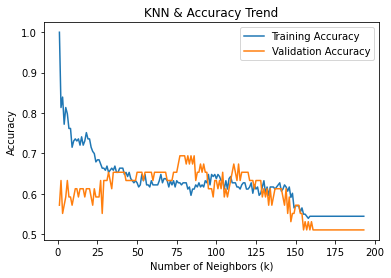

In [218]:
# 2
k_values = range(1, Xt.shape[0] + 1)
_ = plt.plot(k_values, t_accuracy, label = "Training Accuracy")
_ = plt.plot(k_values, v_accuracy, label = "Validation Accuracy")
_ = plt.title("KNN & Accuracy Trend")
_ = plt.xlabel("Number of Neighbors (k)")
_ = plt.ylabel("Accuracy")
_ = plt.legend()

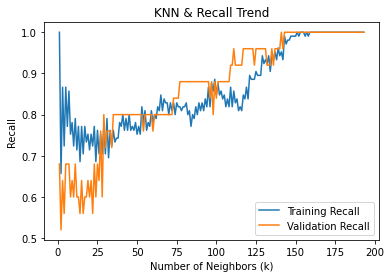

In [219]:
_ = plt.plot(k_values, t_recall, label = "Training Recall")
_ = plt.plot(k_values, v_recall, label = "Validation Recall")
_ = plt.title("KNN & Recall Trend")
_ = plt.xlabel("Number of Neighbors (k)")
_ = plt.ylabel("Recall")
_ = plt.legend()

In [220]:
# 3
best_acc = max(v_accuracy)
best_rec = max(v_recall)
best_k_acc = k_values[v_accuracy.index(best_acc)]
best_k_rec = k_values[v_recall.index(best_rec)]

best_k_acc, best_acc

(77, 0.6938775510204082)

In [221]:
best_k_rec, best_rec

(141, 1.0)

The k value of 77 gives the best accuracy with the value of 0.694.\
All k values above 141 gives the best recall with the value of 1.0

KNN Model:

Accuracy: 0.694
Recall: 1.0

Naive Model:

Accuracy: 0.775
Recall: 1.0

Logistic Regression Model:

Accuracy: 0.796
Recall: 0.84

Comparing with the naive model, accuracy is slightly lower for the KNN model, but the recall is the same. However, when compared to the logistic regression model, the KNN model has a lower accuracy and a higher recall.

Q4

When the value of k is very small (k=1 in both accuaracy and recall graph), the model is overfitting, the gap is huge between training and recall in both accuaracy and recall. Because the model becomes overly sensitive to individual data points in the training set. They overly rely on the nearest neighbors, which can lead to capturing noise or individual data point characteristics in the training set.

On the other hand, as the value of k approaches the total number of training data points and the trend line become to flatten out (k values above 155 in accuacy graph and k = 141 in recall graph), the model starts to underfit. This is because the model becomes less sensitive to individual data points. It relies more on a majority vote of the neighbors, resulting in a simpler model. This simplicity can lead to underfitting, where the model fails to capture the underlying patterns and complexities of the data. 

## 3.2 Decision trees

In [222]:
# 1
from sklearn.tree import DecisionTreeClassifier

depth_values = range(1, 11)
tree_t_accuracy = []
tree_t_recall = []

tree_v_accuracy = []
tree_v_recall = []

for depth in depth_values:
    # Create an instance of the Decision Tree model with the current max depth value
    m = DecisionTreeClassifier(max_depth=depth)
    # Train the model on training data
    m.fit(Xt, yt)
    # Make predictions on training data
    yt_pred = m.predict(Xt)
    # Calculate the performance metrics on the training data and store
    t_acc = accuracy_score(yt, yt_pred)
    tree_t_accuracy.append(t_acc)
    t_re = recall_score(yt, yt_pred)
    tree_t_recall.append(t_re)
    # Make predictions on the validation data
    yv_pred = m.predict(Xv)
    # Calculate the performance metrics on the validation data and store
    v_acc = accuracy_score(yv, yv_pred)
    v_re = recall_score(yv, yv_pred)
    tree_v_accuracy.append(v_acc)
    tree_v_recall.append(v_re)

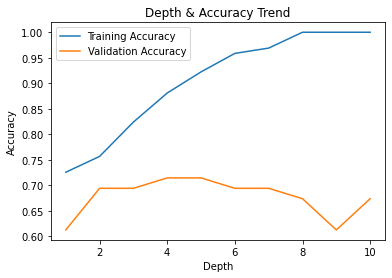

In [223]:
# 2
_ = plt.plot(depth_values, tree_t_accuracy, label = "Training Accuracy")
_ = plt.plot(depth_values, tree_v_accuracy, label = "Validation Accuracy")
_ = plt.title("Depth & Accuracy Trend")
_ = plt.xlabel("Depth")
_ = plt.ylabel("Accuracy")
_ = plt.legend()

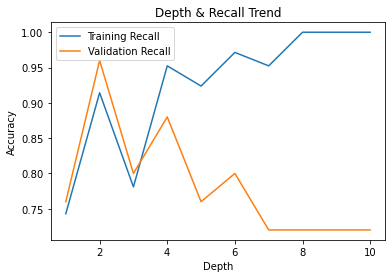

In [224]:
_ = plt.plot(depth_values, tree_t_recall, label = "Training Recall")
_ = plt.plot(depth_values, tree_v_recall, label = "Validation Recall")
_ = plt.title("Depth & Recall Trend")
_ = plt.xlabel("Depth")
_ = plt.ylabel("Recall")
_ = plt.legend()

In [225]:
# 3
best_acc = max(tree_v_accuracy)
best_rec = max(tree_v_recall)
best_tree_acc = depth_values[tree_v_accuracy.index(best_acc)]
best_tree_rec = depth_values[tree_v_recall.index(best_rec)]

best_tree_acc, best_acc

(4, 0.7142857142857143)

In [226]:
best_tree_rec, best_rec

(2, 0.96)

The depth value of 4 gives the best accuracy with the value of 0.714\
The depth value of 2 gives the best recall with the value of 0.96

Decision Tree Model:

Accuracy: 0.714
Recall: 0.96

Naive Model:

Accuracy: 0.775
Recall: 1.0

Logistic Regression Model:

Accuracy: 0.796
Recall: 0.84

Comparing with the naive model, both accuracy and recall is slightly lower in decision tree model. When compared to the logistic regression model, both accuracy and recall are also slightly lower in decision tree model

Q4

Since the training accuracy and recall lines are consistently higher than the validation lines for all values of max depth in accuracy plot and higher than the validation lines for most values of max depth in recall plot, it indicates that the model is overfitting the training data. 

In this case, higher values of max depth may lead to overfitting, and underfitting seems not happen in the decision tree model. A higher max depth allows the decision tree to create more complex and detailed splits, resulting in a model that can perfectly fit the training data but may struggle to generalize to new data.

To mitigate overfitting, we can consider selecting a lower value of max depth, which would result in a simpler decision tree with fewer levels and fewer splits. This can help reduce the model's complexity and improve its ability to generalize to unseen data.

Q5

Decision Tree Model: Accuracy: 0.714 

Naive Model: Accuracy: 0.775 

Logistic Regression Model: Accuracy: 0.796

KNN Model: Accuracy: 0.694

In [227]:
0.816 - 0.775

0.040999999999999925

The accuaracy result of each model varies between each run, but after running multiple times, I found logistic regression model generate the highest validation accuracy in most cases. And the accuracy of logistic regression is 0.041 over that of the naive model.

## 4 How confident are we in the results

In [228]:
# 1
phat = m_log.predict_proba(Xv)[:, 1]
phat[:10]

array([0.55682516, 0.96391249, 0.17975505, 0.28031917, 0.43354715,
       0.32473239, 0.28993389, 0.30152201, 0.90605923, 0.06258177])

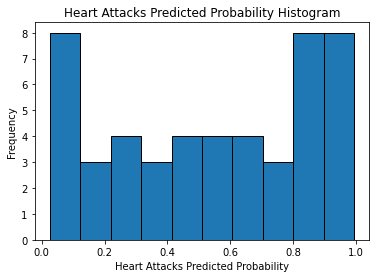

In [229]:
# 2
_ = plt.hist(phat, bins=10, edgecolor='k')
_ = plt.title("Heart Attacks Predicted Probability Histogram")
_ = plt.xlabel("Heart Attacks Predicted Probability")
_ = plt.ylabel("Frequency")

From the histogram above, the predicted probabilities are more extreme, mostly located either 0 or 1.

Q3

In logistic regression, the predicted probabilities represent the likelihood of an instance belonging to the positive class (heart attack) based on the given input features. The predicted probability ranges from 0 to 1, where 0 indicates a low likelihood and 1 indicates a high likelihood.

When the predicted probability is close to 0 or 1, it suggests that the model is confident in its prediction. These extreme probabilities indicate a clear separation between the positive and negative classes. On the other hand, when the predicted probability is around 0.5, it implies that the model is uncertain about the instance's class membership. A probability of 0.5 means that the model is assigning an equal likelihood to both the positive and negative classes. 

In terms of accuracy, when the predicted probabilities are close to 0 or 1, the model's predictions are likely to be more accurate because they align with the true labels. However, when the probabilities are clustered around 0.5, the accuracy may be lower since the model is less certain about the correct class.

## 5 Final model goodness

In [230]:
# 1
m_log.fit(Xw, yw)

LogisticRegression(max_iter=1000)

In [231]:
# 2
heart_test = pd.read_csv("test_data.csv")

y_final = heart_test.output
X_final = heart_test.drop("output", axis=1)

yhat_final = m_log.predict(X_final)

final_acc = accuracy_score(y_final, yhat_final)
final_acc

0.819672131147541

Accuracy is 0.869 is my final model performance measure

I spend 11 hours on this ps